In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
from matplotlib import style
style.use('seaborn-v0_8')
warnings.filterwarnings('ignore')

In [3]:
churn_data = pd.read_csv(r"D:\\Customer Churn Prediction Project\\Datasetforimplementation.csv")

In [4]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
churn_data.shape

(10000, 14)

In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
churn_data = churn_data.drop(['CustomerId', 'RowNumber','Surname'], axis=1)    

In [9]:
churn_data.duplicated().sum()

0

In [10]:
churn_data['Age_bins']= pd.cut(churn_data['Age'],bins= [18,30,50,70,92],labels= ['18-29','30-49','50-69','70-92'])
#check the dataset statistics


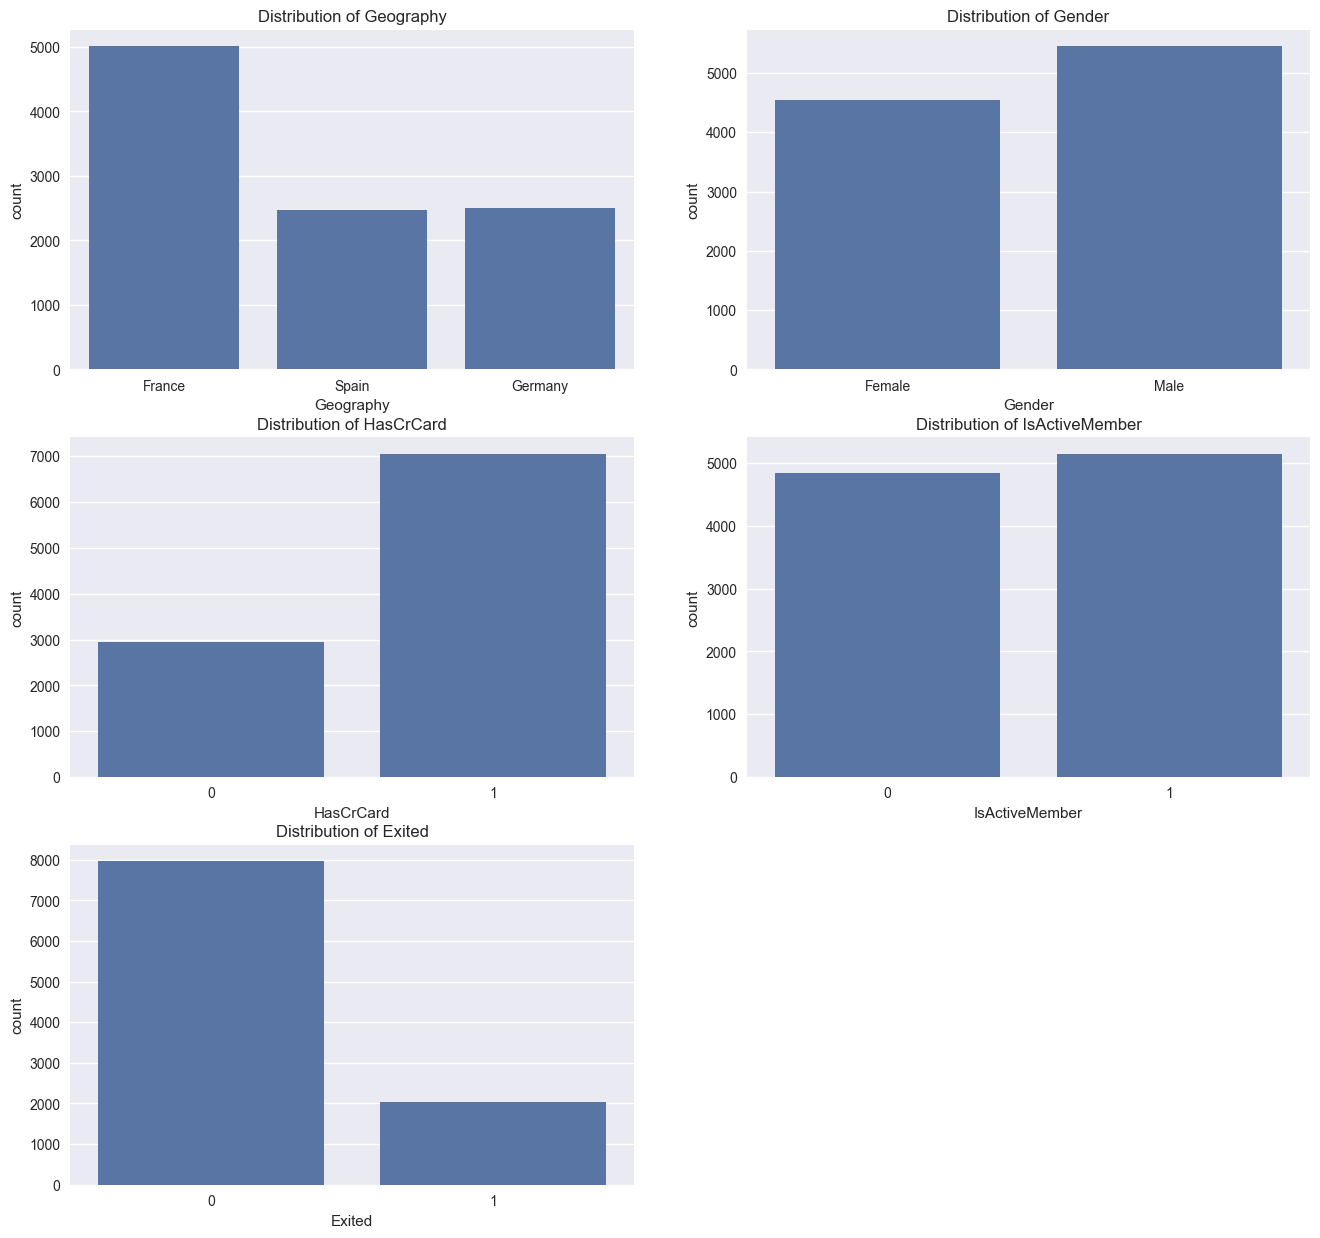

In [11]:
# Visualizing the categorical features
cat= ['Geography','Gender','HasCrCard','IsActiveMember','Exited']

plt.figure(figsize=(16,15))

for i,col in enumerate(cat):
    plt.subplot(3,2,i +1)
    sns.countplot(churn_data,x=col)
    plt.title(f'Distribution of {col}')

plt.show()

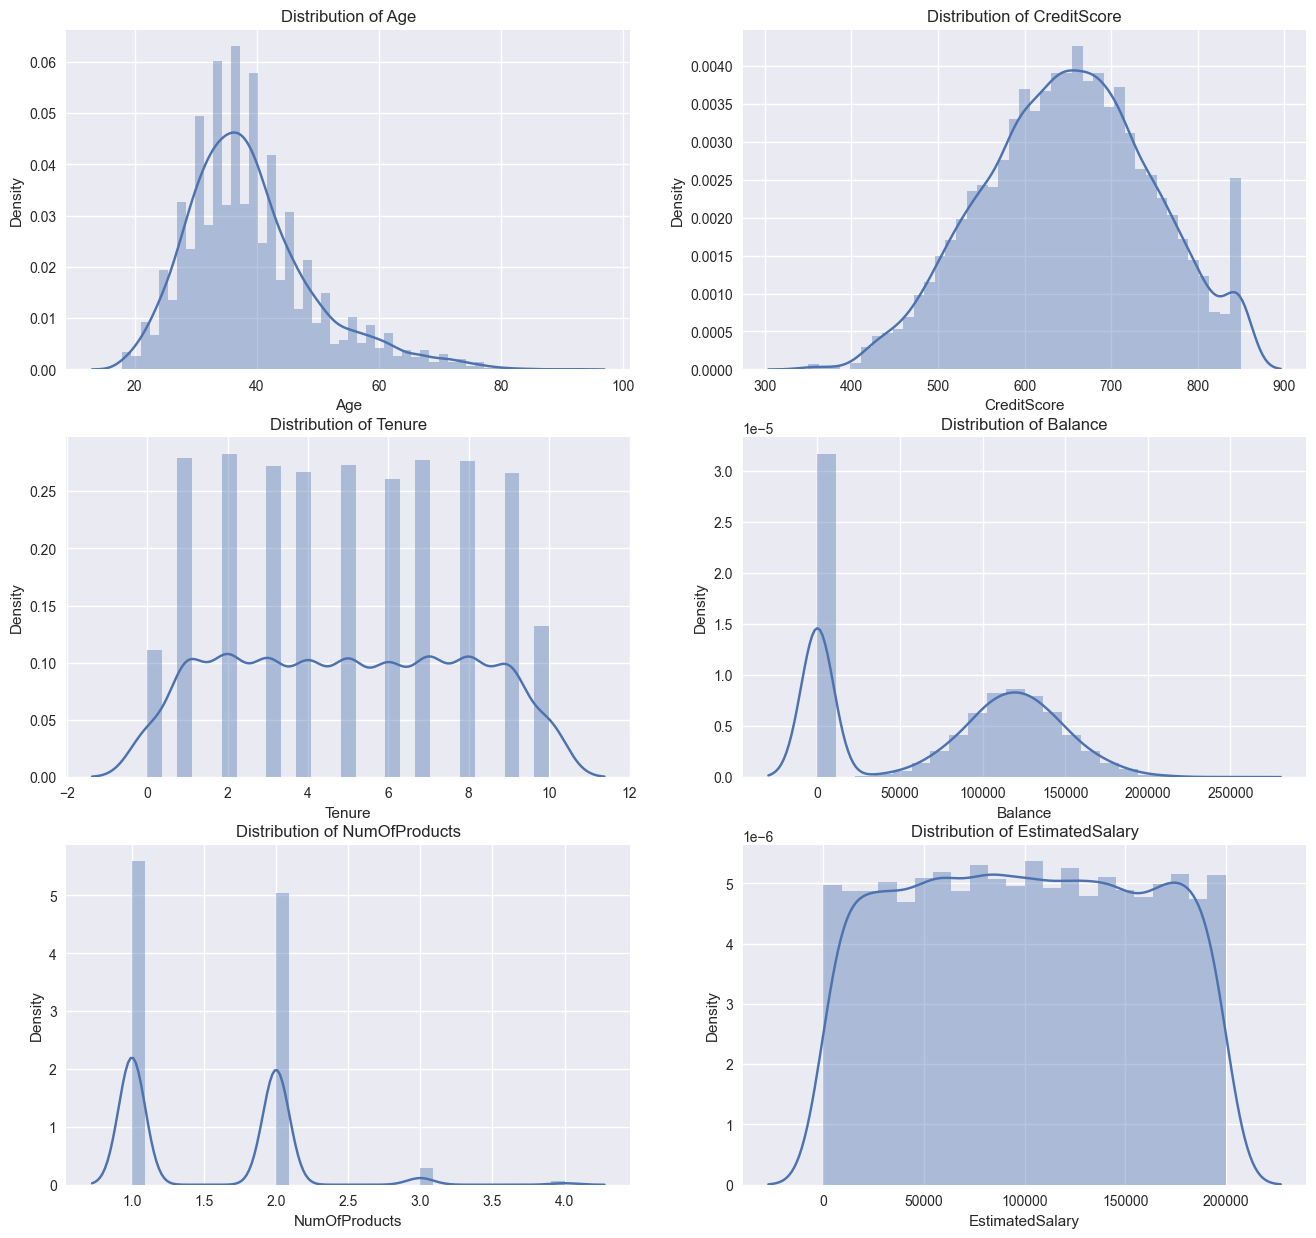

In [12]:
num= ['Age','CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']

plt.figure(figsize=(16,15))

for i,col in enumerate(num):
    plt.subplot(3,2,i +1)
    sns.distplot(churn_data[col])
    plt.title(f'Distribution of {col}')

plt.show()

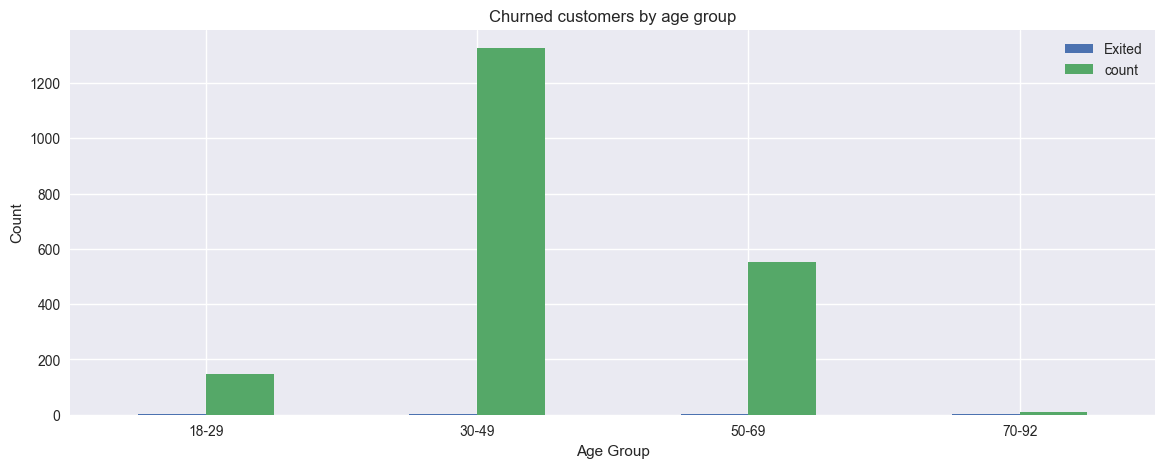

In [13]:
age= churn_data[['Age_bins','Exited']]

age= age[(age['Exited']==1)]
age= age.groupby('Age_bins')['Exited'].value_counts().reset_index()
age.set_index('Age_bins',inplace=True)
age.plot(kind='bar',figsize=(14,5))
plt.title('Churned customers by age group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.xticks(rotation= 0, ha='center')

plt.show()

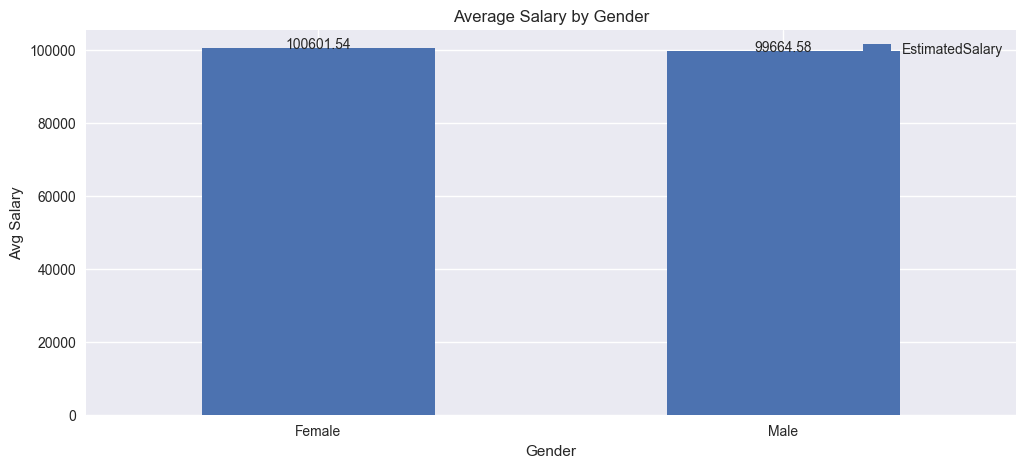

In [14]:
salary= churn_data[['Gender','EstimatedSalary']]

salary =salary.groupby('Gender')['EstimatedSalary'].mean().reset_index()
salary.set_index('Gender',inplace= True)
salary= round(salary,2)
salary.plot(kind='bar',figsize=(12,5))
plt.title('Average Salary by Gender')
plt.ylabel('Avg Salary')
plt.xticks(rotation=0, ha='center')  
plt.legend(loc='upper right') 
           
for i,v in enumerate(salary['EstimatedSalary']):
    plt.text(i,v +0.5 , str(v),ha='center')

plt.show()

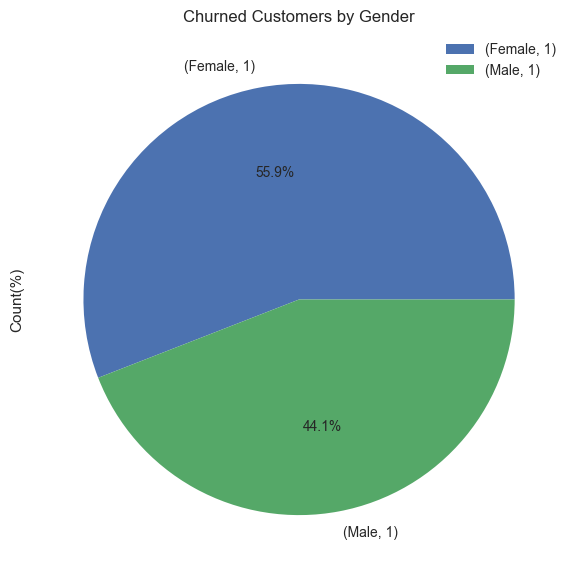

In [15]:
gen= churn_data[['Gender','Exited']]
gen_churn= gen[(gen['Exited']==1)]
gen_churn= gen_churn.groupby('Gender')['Exited'].value_counts()
#gen_churn.set_index('Gender',inplace=True)
gen_churn.plot(kind='pie',y= gen_churn.index,autopct='%1.1f%%',figsize=(10,7))
plt.title('Churned Customers by Gender')
plt.ylabel('Count(%)')
plt.legend()

plt.show()

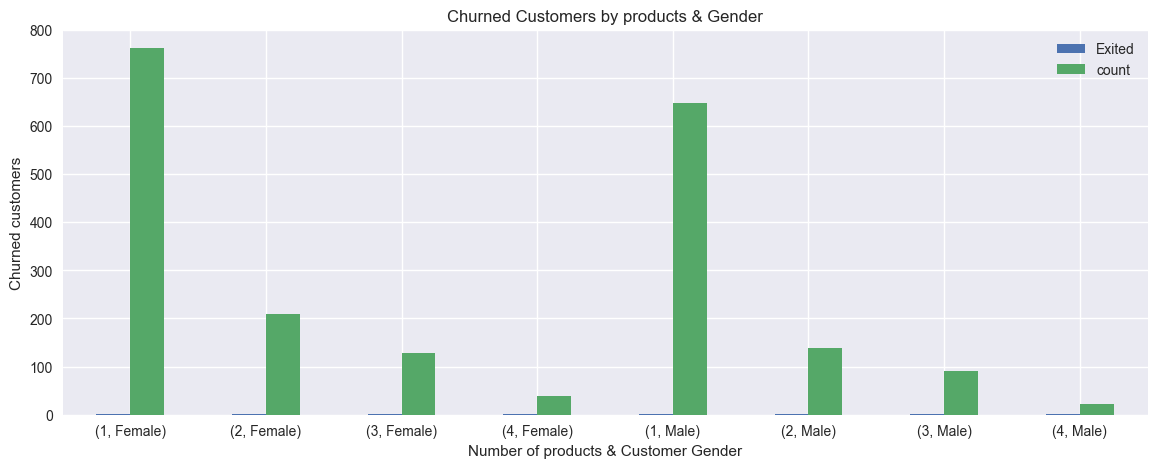

In [16]:
product= churn_data[['Exited','NumOfProducts','Gender']]

prod= product[(product['Exited']==1)]
prod= prod.groupby(['Exited','Gender'])['NumOfProducts'].value_counts().reset_index()
prod.set_index(['NumOfProducts','Gender'],inplace=True)
prod.plot(kind='bar',figsize=(14,5))
plt.title('Churned Customers by products & Gender')
plt.xlabel('Number of products & Customer Gender')
plt.ylabel('Churned customers')
plt.xticks(rotation=0,ha='center')

plt.show()

Ensemble Methods

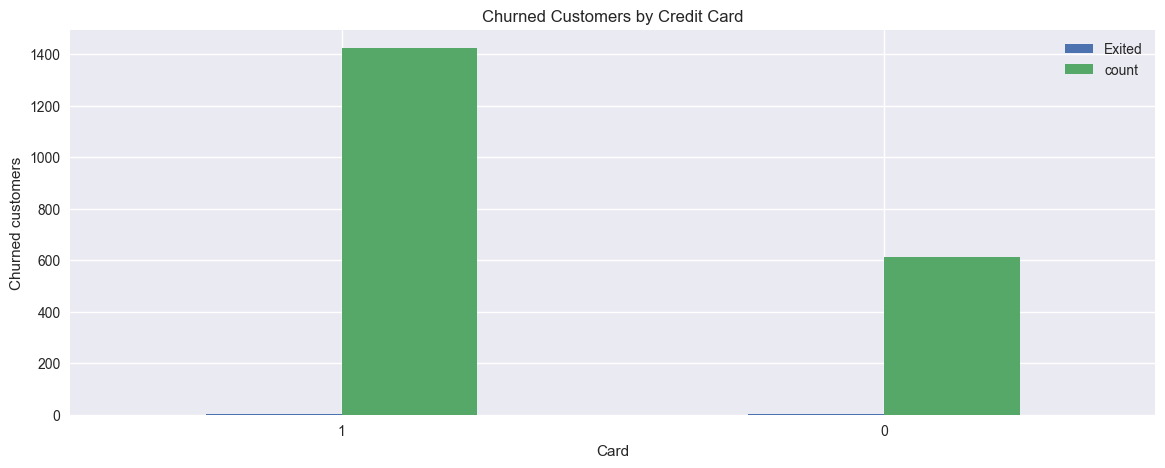

In [17]:
card= churn_data[['Exited','HasCrCard']]
card= card[(card['Exited']==1)]
card= card.groupby('Exited')['HasCrCard'].value_counts().reset_index()
card.set_index('HasCrCard',inplace =True)
card.plot(kind='bar',figsize=(14,5))
plt.title('Churned Customers by Credit Card')
plt.xlabel('Card')
plt.ylabel('Churned customers')
plt.xticks(rotation=0,ha='center')

plt.show()

In [18]:
#Encode categorical features
le= LabelEncoder()

cat= ['Geography','Gender','HasCrCard','IsActiveMember','Exited']

for i in (cat):
    churn_data[i]= le.fit_transform(churn_data[i])

In [19]:
X= churn_data.drop(columns=['Exited','Age_bins'],axis=1)

y=churn_data['Exited']

In [20]:
#resampling the dataset
smote = SMOTE(sampling_strategy='auto', k_neighbors=10, random_state=0)

X_re,y_re= smote.fit_resample(X,y)

print(X_re.shape,y_re.shape)

(15926, 10) (15926,)


In [21]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  int32   
 2   Gender           10000 non-null  int32   
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  Age_bins         9978 non-null   category
dtypes: category(1), float64(2), int32(2), int64(7)
memory usage: 791.3 KB


In [22]:
#Standardize the data
sc= StandardScaler()

num= ['Age','CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']
for i in (num):
    churn_data[i]= sc.fit_transform(churn_data[i].values.reshape(-1,1))

In [23]:
#Train test split 
X_train,X_test,y_train,y_test = train_test_split(X_re, y_re, test_size=0.30, random_state= 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11148, 10), (4778, 10), (11148,), (4778,))

Model Implementation


In [24]:
log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [25]:

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

logreg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.774757125296992


In [26]:
y_pred= log_reg.predict(X_test)
acc= accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68      2327
           1       0.70      0.67      0.68      2451

    accuracy                           0.68      4778
   macro avg       0.68      0.68      0.68      4778
weighted avg       0.68      0.68      0.68      4778



In [27]:
# Random Forest Algorithm

rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42)

grid_search = RandomizedSearchCV (rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced'}
Best Accuracy: 0.8511826373506992


In [37]:
y_pred= rf.predict(X_test)
acc_rf= accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [30]:
gb= GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [31]:
y_pred= gb.predict(X_test)
acc_gb= accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2448
           1       0.83      0.84      0.83      2330

    accuracy                           0.84      4778
   macro avg       0.84      0.84      0.84      4778
weighted avg       0.84      0.84      0.84      4778



In [32]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
y_pred= knn.predict(X_test)
acc_knn= accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.59      0.66      0.62      2149
           1       0.69      0.62      0.66      2629

    accuracy                           0.64      4778
   macro avg       0.64      0.64      0.64      4778
weighted avg       0.65      0.64      0.64      4778



In [34]:
models= pd.Series([acc,acc_rf,acc_gb,acc_knn],['LogReg','RF','GB','KNN'])

NameError: name 'acc_rf' is not defined

In [35]:
models.plot(kind='bar',figsize=(16,5))
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Model Accuracy')
plt.xticks(rotation=0,ha='center')

for i,v in enumerate(models):
    plt.text(i,v + 0.01,str(round(v,2)),ha='center')
plt.show()

NameError: name 'models' is not defined